# 1. Imports

In [ ]:
# !wget https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux_NoVis.zip .
# !unzip Reacher_Linux_NoVis.zip

In [2]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import seaborn as sns
import pandas as pd

from unityagents import UnityEnvironment

from trainer import trainer
from ddpg_agent import Agent as DDPGAgent

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# 2. Environment

In [3]:
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

print('Number of agents:', len(env_info.agents))
print('Number of actions:', action_size)
print('States look like:', state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
States have length: 33


# 3. Solution

The environment is solved with the following hyperparameters:

```
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-5         # learning rate of the actor 
LR_CRITIC = 3e-5        # learning rate of the critic
WEIGHT_DECAY = 0.0001   # L2 weight decay
```

In [ ]:
start_time = time.time()
agent = DDPGAgent(state_size=state_size, action_size=action_size)
scores, episodes = trainer(agent, env, brain_name, n_episodes=10000, score_solved=30.0, model_filename='solution.pth')
elapsed_time = round(time.time() - start_time, 2)
print("\nElapsed time: ", elapsed_time)
scores_df = pd.DataFrame(scores, columns=['score'])
scores_df.to_csv('scores.csv', index=False)

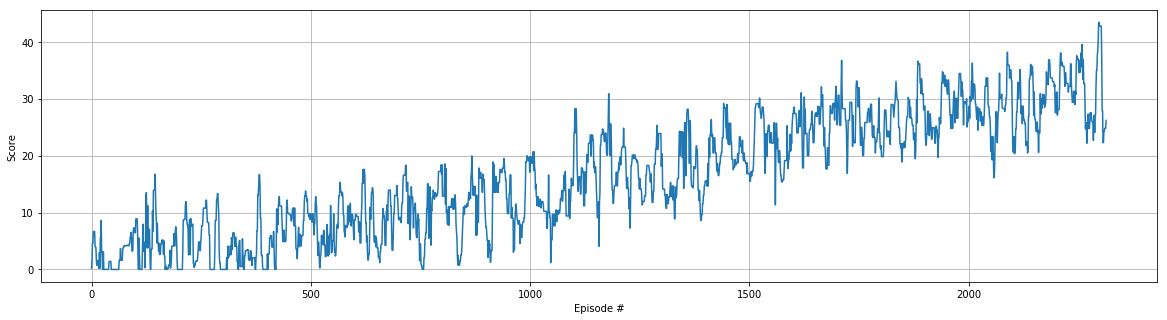

In [12]:
scores = pd.read_csv('scores.csv')
plt.figure(figsize=(20,5))
plt.plot(range(len(scores)), scores.values)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.grid()
plt.show()